# Clustering of stock prices based on sensitivity to economic indicators

The goal of this project is to identify groups of stocks that behave the similar ways under various economic conditions. For each stock, I will extract a set of correlation coefficients, which will then be used as features for clustering. The validity of the clustering will be assessed by examining how stocks that cluster together behave in future time.

## Economic indicators

The first step was choosing a set of indicators that could likely influence stock prices and have sufficient variability for a meaningful analysis (e.g., not steadily rising or falling, which would positively or negatively correlated with general (upward) market trends). I used online resources such as blogs and the federal reserve website to gather a set of reasonable candidates:

- 10 year US treasury bond yield (daily)
- Gold fixing price (USD, daily, PM)
- Crude oil price per barrel (daily average of WPI and Brent)
- US dollar effective exchange rate (Broad index, daily)
- Median consumer price index (monthly)
- Producer price index (monthly)
- US natural unemployment rate (quarterly)
- US GDP per capita (quarterly)
- US debt as percent of GDP (quarterly)
- US number of housing starts (monthly)
- US total construction spending (monthly)
- Case-Shiller national housing price index (monthly)
- Industrial production index (monthly)
- US corporate profits after tax (quarterly)
- US 10 year breakeven inflation rate (monthly)

I chose to focus on the period from 2010 through 2016, and use 2017 data as a test set. I thought it would be wise to exclude the time of the financial crisis (2008-2009), where any economic behavior was nearly impossible to predict.

The cell below creates a plot of all indicators vs. time, using monthly averages for daily or monthly data, and quarterly averages otherwise. Note that some indicators, like the consumer price index and GDP, are monotonically increasing and will probably not be very useful for prediction.

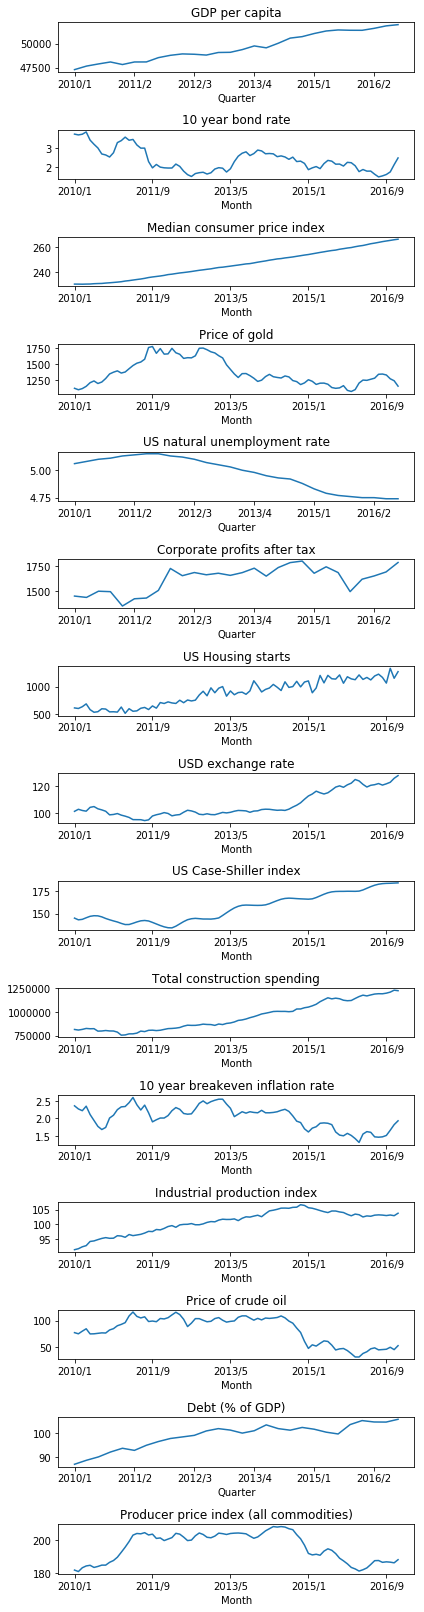

In [1]:
import pandas as pd
import numpy as np
import indicator_correlation as ind
import utils as ut
ind.plot_indicators(ind.indicator_data)

Let's look at an example of 
one company's stock data for the same time period (plus some time lag). It's a company called Amazon that some people think might be hugely successful one day.

In [2]:
# Lag in months.
lag = 6

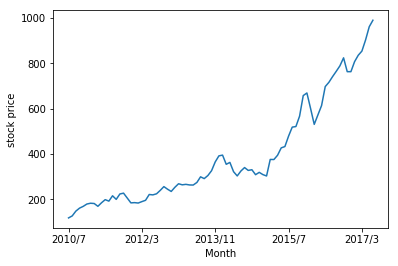

In [3]:
import definitions as dfn
import matplotlib.pyplot as plt
%matplotlib inline
ut.plot_stock_data("amzn", lag)

## Correlation with indicators

Let's look at an example: We will extract a set of correlations between the Amazon stock price and the value of each indicator 6 months (or 2 quarters) before. 

In [4]:
ind.corr_indicators("amzn", ind.indicator_data, lag)

{' Gold': -0.45639038065916021,
 'Bond_rate': -0.49210065844819856,
 'Breakeven_Inflation': -0.72569955672768127,
 'Case_shiller': 0.90755022006877484,
 'Cons_price_index': 0.93213782548043367,
 'Construction_spending': 0.94169002888043507,
 'Corp_profits': 0.45939439227994949,
 'Debt': 0.74550007773606231,
 'Exchange_rate': 0.93943492773443305,
 'GDP': 0.93375677026597426,
 'Housing_starts': 0.84531248108059664,
 'Ind_production': 0.6304757539994652,
 'Name': 'amzn',
 'Oil': -0.79251713024171433,
 'Prod_price_index': -0.43197201977526151,
 'Unemployment': -0.93605020924214022}

For this project, we gather correlation data for all S&P 500 stocks. Stocks that don't have sufficient data (e.g., IPO later than January 2010, like Facebook) will not be included but added to the "failure" list.

Note that you will need to extract the archive stocks.zip (uploaded separately) to read all the stock data. The diretory structure should be "data/stocks". To avoid doing so and waiting for this function call to finish processing, replace the code with the commented code that loads a CSV file.

In [5]:
#corr_df, fails = ind.get_correlations_sp_500(ind.indicator_data, lag)
corr_df = pd.read_csv("results/S&P_correlations_lag_%s.csv" % lag, index_col=0)

In [6]:
corr_df.head()

,Name,Gold,Bond_rate,Breakeven_Inflation,Case_shiller,Cons_price_index,Construction_spending,Corp_profits,Debt,Exchange_rate,GDP,Housing_starts,Ind_production,Oil,Prod_price_index,Unemployment
0,A,-0.444812,-0.432286,-0.613442,0.897207,0.900059,0.875338,0.552682,0.772778,0.774977,0.869403,0.836196,0.743623,-0.578258,-0.194602,-0.869903
1,AAP,-0.533338,-0.427571,-0.657889,0.907459,0.914073,0.909415,0.598640,0.761160,0.755203,0.845581,0.874414,0.879006,-0.602327,-0.117459,-0.828397
2,AAPL,-0.337174,-0.521449,-0.601291,0.838397,0.910524,0.881065,0.626870,0.822574,0.735282,0.906258,0.834435,0.845333,-0.522521,-0.048034,-0.836992
3,ABC,-0.521488,-0.399242,-0.534459,0.870861,0.885641,0.865515,0.744768,0.814437,0.686640,0.875543,0.868600,0.913461,-0.528573,-0.026146,-0.828518
4,ABT,-0.358121,-0.528186,-0.467774,0.835155,0.916641,0.863249,0.795551,0.921930,0.660364,0.906529,0.904026,0.949016,-0.441884,0.075224,-0.808863


In [7]:
#fails

let's look at correlations between the features. Too much similarity may suggest we need to drop some of the indicators or use some form of dimensionality reduction.

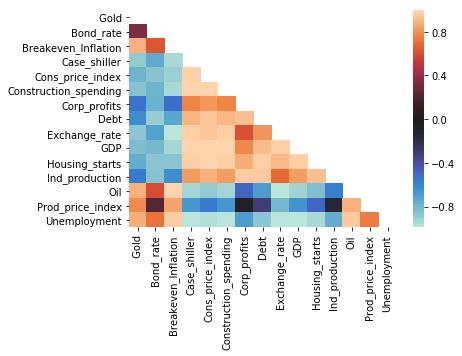

In [8]:
ind.plot_feature_corr(corr_df)

In [9]:
corr_df.corr()

,Gold,Bond_rate,Breakeven_Inflation,Case_shiller,Cons_price_index,Construction_spending,Corp_profits,Debt,Exchange_rate,GDP,Housing_starts,Ind_production,Oil,Prod_price_index,Unemployment
Gold,1.000000,0.344606,0.884759,-0.874274,-0.781519,-0.842681,-0.532367,-0.618547,-0.864072,-0.819610,-0.755578,-0.567964,0.887427,0.782408,0.880903
Bond_rate,0.344606,1.000000,0.629787,-0.741723,-0.843480,-0.785041,-0.775176,-0.890579,-0.708771,-0.802796,-0.856872,-0.842504,0.597649,0.225335,0.714721
Breakeven_Inflation,0.884759,0.629787,1.000000,-0.938701,-0.898740,-0.943104,-0.521652,-0.725925,-0.986656,-0.932494,-0.852670,-0.621725,0.992909,0.851707,0.967121
Case_shiller,-0.874274,-0.741723,-0.938701,1.000000,0.983913,0.995548,0.763897,0.900032,0.969506,0.989392,0.968977,0.821695,-0.921983,-0.663744,-0.990042
Cons_price_index,-0.781519,-0.843480,-0.898740,0.983913,1.000000,0.991886,0.818021,0.950630,0.945697,0.991943,0.993778,0.883697,-0.875628,-0.564175,-0.966674
Construction_spending,-0.842681,-0.785041,-0.943104,0.995548,0.991886,1.000000,0.761200,0.907710,0.976040,0.996165,0.975925,0.830435,-0.926381,-0.657476,-0.989104
Corp_profits,-0.532367,-0.775176,-0.521652,0.763897,0.818021,0.761200,1.000000,0.927509,0.611546,0.772074,0.870891,0.966664,-0.486242,-0.059238,-0.691340
Debt,-0.618547,-0.890579,-0.725925,0.900032,0.950630,0.907710,0.927509,1.000000,0.806216,0.920462,0.971442,0.953831,-0.692113,-0.305665,-0.858402
Exchange_rate,-0.864072,-0.708771,-0.986656,0.969506,0.945697,0.976040,0.611546,0.806216,1.000000,0.970080,0.909387,0.694102,-0.983559,-0.799780,-0.988519
GDP,-0.819610,-0.802796,-0.932494,0.989392,0.991943,0.996165,0.772074,0.920462,0.970080,1.000000,0.976665,0.835375,-0.915958,-0.640469,-0.987985


We remove some features that are very highly correlated with other features. In most cases, these are features that are monotonically rising or falling, giving rise to very high correlations with the stock market. Having all of them in the clustering algorithm introduces redundancy.

In [10]:
corr_df_reduced = corr_df.drop(['Case_shiller', 'Housing_starts', 'Cons_price_index', 'Unemployment', \
                                'GDP', 'Corp_profits','Breakeven_Inflation', 'Exchange_rate', 'Debt'], axis=1)

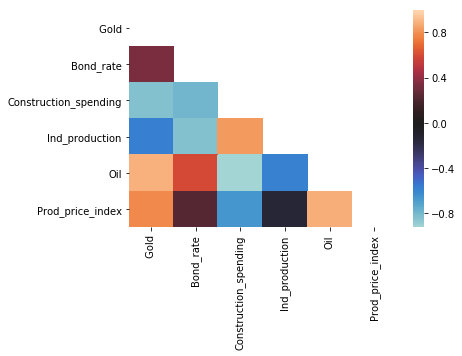

In [11]:
ind.plot_feature_corr(corr_df_reduced)

In [12]:
corr_df_reduced.corr()

,Gold,Bond_rate,Construction_spending,Ind_production,Oil,Prod_price_index
Gold,1.000000,0.344606,-0.842681,-0.567964,0.887427,0.782408
Bond_rate,0.344606,1.000000,-0.785041,-0.842504,0.597649,0.225335
Construction_spending,-0.842681,-0.785041,1.000000,0.830435,-0.926381,-0.657476
Ind_production,-0.567964,-0.842504,0.830435,1.000000,-0.574833,-0.136182
Oil,0.887427,0.597649,-0.926381,-0.574833,1.000000,0.886175
Prod_price_index,0.782408,0.225335,-0.657476,-0.136182,0.886175,1.000000


Histograms of the correlation data would help us understand the quality of the features.

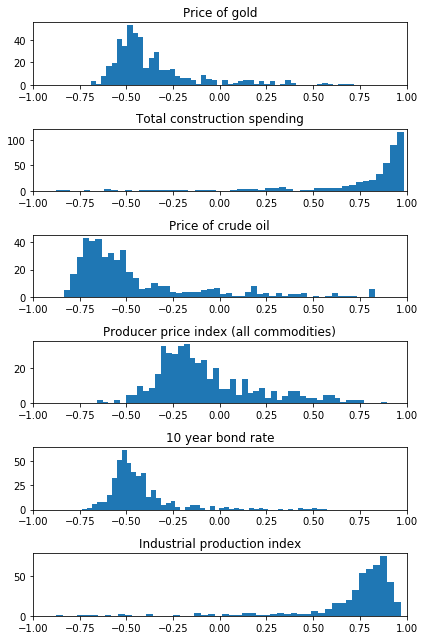

In [13]:
ind.plot_feature_histograms(corr_df_reduced)

The histogram suggest that some features have larger means than others, which would give them an unfair advantage in clustering. Therefore, we standardize the features to have a mean of 0 and a standard deviation of 1.

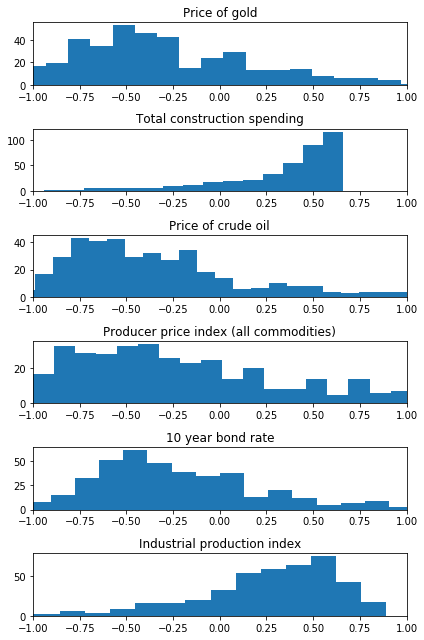

In [14]:
corr_df_scaled = ind.standardize_correlations(corr_df_reduced)
ind.plot_feature_histograms(corr_df_scaled)

## Clustering analysis

The next step is to cluster stock prices based on the correlation features. First, we will determine the optimal number of clusters using an elbow curve.

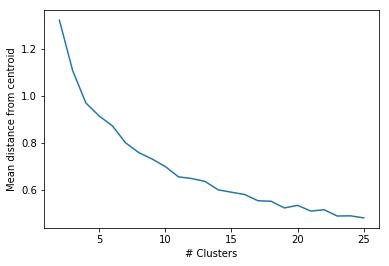

In [15]:
import clustering_analysis as cl

# Extract the numeric columns from feature dataframe.
kmeans_df = corr_df_scaled.select_dtypes(include = ['float64'])
cl.plot_elbow_curve(kmeans_df, max_n_clusters = 25)

Performance seems to level off at 13 clusters, so we will go with that number.

In [16]:
# Run Kmeans with 13 clusters.
n_clusters = 13
kmeans_results = cl.run_kmeans(kmeans_df, n_clusters)

Let's look at a histogram of the cluster assignments.

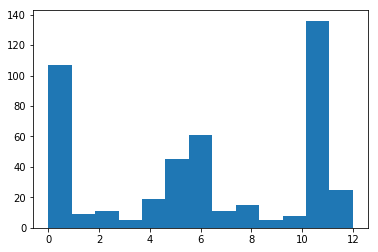

In [17]:
kmeans_labels = kmeans_results.labels_
plt.hist(kmeans_labels, bins=n_clusters);

The plot below shows the stock prices over time for all stocks assigned to each cluster. It looks like the big cluster include stocks that have been monotonically increasing in price over the entire time period.

Processing cluster 0
Processing cluster 1
Processing cluster 2
Processing cluster 3
Processing cluster 4
Processing cluster 5
Processing cluster 6
Processing cluster 7
Processing cluster 8
Processing cluster 9
Processing cluster 10
Processing cluster 11
Processing cluster 12


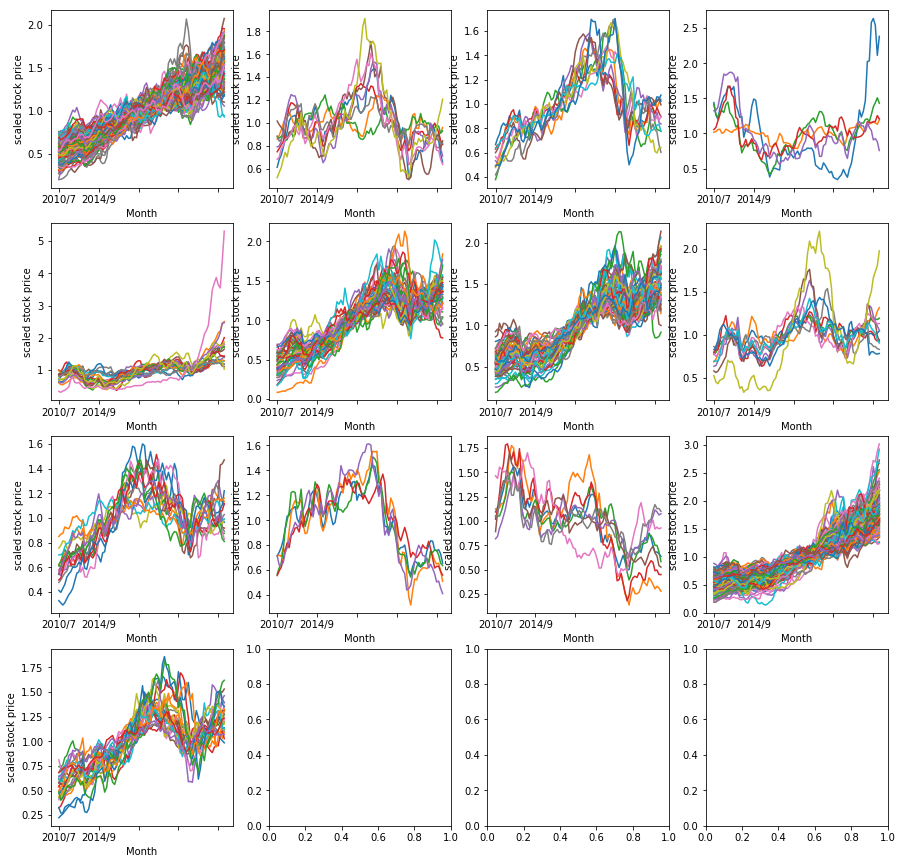

In [18]:
dim = int(np.ceil(np.sqrt(n_clusters)))
fig, ax = plt.subplots(dim, dim)
for k in range(0, n_clusters):
    print "Processing cluster %s" % k
    stocks = corr_df.Name.iloc[np.where(kmeans_labels == k)]
    ut.plot_stock_data(stocks, lag, scaled = True, axes_object = ax[k / dim][k % dim])
fig.set_size_inches(15, 15)

Let's look at one of the smaller clusters. Note the similarity between the stock prices over time.

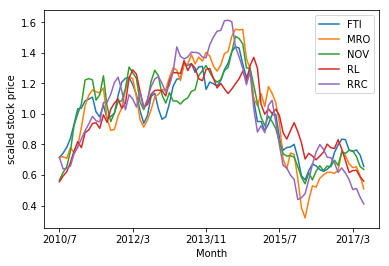

In [19]:
stocks = corr_df.Name.iloc[np.where(kmeans_labels == 9)]
ut.plot_stock_data(stocks, lag, scaled = True)
plt.legend(stocks)

Stocks in this group are:
- FTI (TechnipFMC PLC): Oil and gas consulting
- MRO (Marathon Oil Corporation): Oil and gas
- NOV (National-Oilwell Varco, Inc.): Oil and gas
- RL (Ralph Lauren Corp): Fashion
- RRC (Range Resources Corp.): Natural gas

In [20]:
stocks

179    FTI
288    MRO
304    NOV
359     RL
364    RRC
Name: Name, dtype: object

In [21]:
kmeans_results.cluster_centers_[9]

array([ 3.95030422,  2.17733603, -3.75751808, -2.81151513,  3.69779597,
        3.06143121])

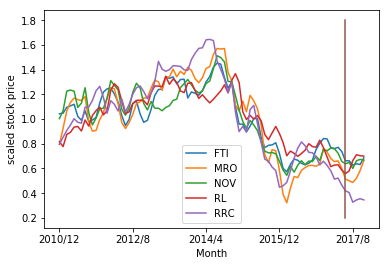

In [22]:
ut.plot_stock_data(stocks, lag + 5, scaled = True)
plt.plot([78, 78], [0.2, 1.8])
plt.legend(stocks);